In [1]:
from typing import List, Sequence
from IPython.display import Image, display

from dotenv import load_dotenv

from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.graph import END, MessageGraph

from chains import generation_chain, reflection_chain

In [2]:
load_dotenv()

True

In [11]:
REFLECT = "reflect"
GENERATE = "generate"

In [12]:
def generation_node(state: Sequence[BaseMessage]):
    return generation_chain.invoke({"messages": state})

In [13]:
def reflection_node(messages: Sequence[BaseMessage]) -> List[BaseMessage]:
    res = reflection_chain.invoke({"messages": messages})
    return [HumanMessage(content=res.content)]

In [61]:
builder = MessageGraph()
builder.add_node(GENERATE, generation_node)
builder.add_node(REFLECT, reflection_node)
builder.set_entry_point(GENERATE)

In [62]:
def should_continue(state: List[BaseMessage]):
    if len(state) > 6:
        return "__end__"
    else:
        return "__reflect__"

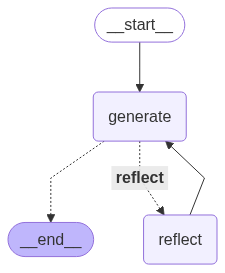

In [63]:
builder.add_conditional_edges(GENERATE, should_continue, {
    "__end__": END,
    "__reflect__": REFLECT,
})
builder.add_edge(REFLECT, GENERATE)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [64]:
inputs = HumanMessage(
        content="""
            Make this tweet better:
             literally cannot wait til I hit 30, get a lil house, adopt 20 cats, & finally fulfill my lifelong dream of becoming a crazy cat lady.
        """
    )
response = graph.invoke(inputs)
print(response)

[HumanMessage(content='\n            Make this tweet better:\n             literally cannot wait til I hit 30, get a lil house, adopt 20 cats, & finally fulfill my lifelong dream of becoming a crazy cat lady.\n        ', additional_kwargs={}, response_metadata={}, id='7d0c8035-2dae-4dfa-9f85-e0115e75c111'), AIMessage(content='🌟 Counting down the days until I hit 30! 🎉 Dreaming of a cozy little house filled with love, where I can adopt 20 adorable cats and finally embrace my destiny as the ultimate crazy cat lady. 🐾❤️ #CatLadyGoals #LifeDreams', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 95, 'total_tokens': 152, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_dbaca60df0', 'id': 'chatcmpl-BYa0GlhtO